In [1]:
import sys
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [3]:
%matplotlib inline

## Loading Files

 - Set up the environment variable
 - Load csv of each city

In [26]:
DIR_PATH =  os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
FRANCE_PATH = os.path.join(DATA_PATH + os.sep, "France")
LYON_PATH = os.path.join(FRANCE_PATH + os.sep, "Lyon" + os.sep)
PARIS_PATH = os.path.join(FRANCE_PATH + os.sep, "Paris" + os.sep)
BDX_PATH = os.path.join(FRANCE_PATH + os.sep, "Bordeaux" + os.sep)

In [27]:
lyon_listings = pd.read_csv(LYON_PATH+"listings.csv", low_memory=False)
lyon_reviews = pd.read_csv(LYON_PATH+"reviews.csv", low_memory=False)

In [28]:
lyon_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,30187,https://www.airbnb.com/rooms/30187,20181118040629,2018-11-18,Le Petit Tramassac - Old town Lyon,NaN,Le Petit Tramassac welcome you in the heart of...,Le Petit Tramassac welcome you in the heart of...,none,NaN,...,t,NaN,{LYON},t,f,strict_14_with_grace_period,f,f,7,0.12
1,56766,https://www.airbnb.com/rooms/56766,20181118040629,2018-11-18,Amazing duplex-terrace in old Lyon,Beautifull duplex terrace on Lyon's roofs ! Co...,We offer a delightful large duplex in the very...,Beautifull duplex terrace on Lyon's roofs ! Co...,none,"l'ambiance générale, la magnifique architectur...",...,t,NaN,{LYON},f,f,strict_14_with_grace_period,f,f,1,0.56
2,71455,https://www.airbnb.com/rooms/71455,20181118040629,2018-11-18,La Loge des Avocats - Vieux Lyon,La Loge des Avocats est un appartement meublé ...,La Loge des Avocats est un appartement meublé ...,La Loge des Avocats est un appartement meublé ...,none,NaN,...,t,NaN,{LYON},t,f,strict_14_with_grace_period,f,f,2,0.18
3,72545,https://www.airbnb.com/rooms/72545,20181118040629,2018-11-18,COOL CITY-LOFT GAILLETON,L'appartement est situé au 4ème étage d'un imm...,The apartment is located in the heart of Lyon....,L'appartement est situé au 4ème étage d'un imm...,none,Entre Rhône et Saône à proximité de tout ! Vou...,...,t,NaN,{LYON},t,f,strict_14_with_grace_period,f,f,15,0.60
4,77104,https://www.airbnb.com/rooms/77104,20181118040629,2018-11-18,Nice Flat in the center of Lyon,NaN,"En plein coeur de Lyon, sur la Presqu'ile. A 5...","En plein coeur de Lyon, sur la Presqu'ile. A 5...",none,NaN,...,t,NaN,{LYON},f,f,strict_14_with_grace_period,f,f,1,0.17


In [29]:
lyon_listings = lyon_listings.loc[:,['id', 'room_type', 'host_id', 'host_since', 'host_response_rate', 'reviews_per_month', 'review_scores_value', 'review_scores_location', 'review_scores_communication', 
'review_scores_checkin', 'review_scores_cleanliness', 'review_scores_rating', 'price', 'cleaning_fee', 'zipcode', 'number_of_reviews']]


In [30]:
lyon_listings = lyon_listings.dropna(subset=['id', 'room_type', 'host_id', 'host_since', 'reviews_per_month', 'price', 'zipcode' ])
lyon_listings

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
0,30187,Entire home/apt,2923669,2012-07-13,96%,0.12,9.0,10.0,9.0,10.0,10.0,96.0,$70.00,$35.00,69005,12
1,56766,Entire home/apt,269557,2010-10-24,70%,0.56,9.0,10.0,10.0,10.0,9.0,94.0,$160.00,$60.00,69005,55
2,71455,Entire home/apt,365968,2011-01-28,100%,0.18,9.0,10.0,9.0,9.0,9.0,97.0,$80.00,$35.00,69005,6
3,72545,Entire home/apt,376459,2011-02-04,NaN,0.60,8.0,10.0,9.0,9.0,9.0,89.0,$95.00,$35.00,69002,56
4,77104,Entire home/apt,411285,2011-02-26,100%,0.17,10.0,10.0,10.0,10.0,10.0,99.0,$70.00,$20.00,69001,16
5,82195,Entire home/apt,447032,2011-03-17,67%,0.64,9.0,10.0,9.0,9.0,10.0,91.0,$45.00,$0.00,69001,44
6,105104,Private room,546198,2011-04-30,NaN,0.76,9.0,9.0,10.0,10.0,10.0,96.0,$53.00,NaN,69003,69
7,134539,Entire home/apt,660135,2011-06-03,50%,1.17,9.0,10.0,9.0,9.0,8.0,89.0,$52.00,$25.00,69005,105
8,136556,Entire home/apt,668524,2011-06-05,100%,0.01,10.0,10.0,10.0,10.0,10.0,100.0,$99.00,NaN,69003,1
9,137132,Entire home/apt,670404,2011-06-06,NaN,0.19,9.0,10.0,10.0,10.0,10.0,95.0,$88.00,NaN,69006,17


## Lyon Analysis

### Type of room and Price details

In [33]:
# sort by price
lyon_listings_per_price = lyon_listings.sort_values(by="price")
lyon_listings_per_price

,id,room_type,host_id,host_since,host_response_rate,reviews_per_month,review_scores_value,review_scores_location,review_scores_communication,review_scores_checkin,review_scores_cleanliness,review_scores_rating,price,cleaning_fee,zipcode,number_of_reviews
3306,11550632,Private room,19010946,2014-07-28,NaN,0.12,10.0,8.0,10.0,10.0,8.0,80.0,10.00,NaN,69008,4
8626,22513837,Shared room,56952209,2016-02-01,90%,2.07,8.0,9.0,9.0,9.0,8.0,79.0,10.00,$15.00,69001,18
3865,13120423,Shared room,38911425,2015-07-19,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,10.00,$10.00,69001,1
6980,21123952,Entire home/apt,152364134,2017-09-27,67%,0.39,10.0,10.0,10.0,9.0,10.0,95.0,100.00,$40.00,69001,5
7567,21781901,Entire home/apt,158140466,2017-11-10,NaN,0.09,8.0,10.0,10.0,10.0,8.0,80.0,100.00,NaN,69005,1
3340,11727443,Entire home/apt,34645159,2015-05-31,63%,0.19,10.0,10.0,10.0,10.0,10.0,96.0,100.00,$20.00,69005,6
6484,19816450,Entire home/apt,140000338,2017-07-12,NaN,0.74,9.0,9.0,9.0,9.0,9.0,93.0,100.00,$50.00,69007,12
7562,21779620,Private room,44916426,2015-09-23,NaN,0.17,8.0,10.0,9.0,9.0,9.0,90.0,100.00,$30.00,69001,2
10613,28961366,Entire home/apt,150977983,2017-09-17,100%,1.67,10.0,10.0,10.0,10.0,10.0,100.0,100.00,$25.00,69003,2
7561,21779561,Entire home/apt,129966679,2017-05-12,100%,0.09,8.0,10.0,10.0,10.0,8.0,80.0,100.00,NaN,69009,1


In [34]:
lyon_listings.price = [x.strip('$') for x in lyon_listings.price]
lyon_listings.price = lyon_listings.price.apply(lambda x: x.replace(',',''))

In [50]:
#mean of price in lyon
lyon_listings["price"] = pd.to_numeric(lyon_listings["price"])
mean_price_lyon = lyon_listings.price.mean()
print("Mean price in lyon per night : "+str(mean_price_lyon) + " $ ")

Mean price in lyon per night : 75.53056741915802 $ 


<function matplotlib.pyplot.show(*args, **kw)>

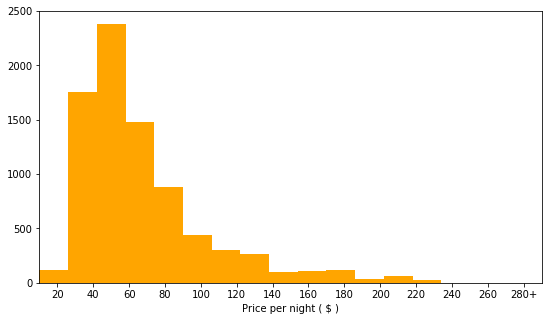

In [36]:
price_lyon = lyon_listings['price']
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,20)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)
plt.xlabel("Price per night ( $ )")
plt.hist(price_lyon, color='orange', bins = bins)
plt.show

In [37]:
total_houses_lyon = len(lyon_listings)
print("Total of houses in lyon having datas : " + str(total_houses_lyon))

Total of houses in lyon having datas : 8195


In [38]:
# Type of room 
lyon_room = lyon_listings
lyon_entire_house = lyon_room.loc[lyon_room['room_type'] == "Entire home/apt"]
lyon_private_room = lyon_room.loc[lyon_room['room_type'] == "Private room"]
lyon_total_private_room = len(lyon_private_room)
print("Total of private room in Lyon having datas : "+str(lyon_total_private_room))
print("("+str(lyon_total_private_room/total_houses_lyon *100)+"%)")
print("------------------------------------------------------------")
lyon_total_entire_house = (len(lyon_listings)-len(lyon_private_room))
percentage_entire_house = lyon_total_entire_house/total_houses_lyon *100 
print("Total of entire house in Lyon having datas : "+str(lyon_total_entire_house))
print("("+str(percentage_entire_house)+"%)")

Total of private room in Lyon having datas : 1746
(21.30567419158023%)
------------------------------------------------------------
Total of entire house in Lyon having datas : 6449
(78.69432580841976%)


In [39]:
# Comparison between private and entire house
lyon_private_room_mean_price = lyon_private_room.price.mean()
print("Mean price of private room in lyon : "+str(lyon_private_room_mean_price))
#------------------------------
lyon_entire_house_mean_price = lyon_entire_house.price.mean()
print("Mean price of entire house in lyon : "+str(lyon_entire_house_mean_price))

Mean price of private room in lyon : 42.82703321878579
Mean price of entire house in lyon : 84.94220830070478


In [40]:
ttest_ind(lyon_private_room['price'], lyon_entire_house['price'])

Ttest_indResult(statistic=-12.77454038241825, pvalue=5.155353477137771e-37)

**Summary**

Number of listing in lyon : 
   - Total : 8 195
   - Private room : 1 746 (21.31%)
   - Entire house : 6 449 (78.69%)

Mean price in lyon : 
   - Total : 76.98
   - Private room : 42.83
   - Entire house : 84.94

### Activity

Checking reviews/listing/month

In [46]:
review_per_month_mean = lyon_room.reviews_per_month.mean()
print("Mean of review per month per listing : "+str(review_per_month_mean))

Mean of review per month per listing : 1.156744356314826


Total reviews 

In [51]:
total_reviews_lyon = len(lyon_reviews)
first_reviews = min(lyon_reviews['date'])
print("Total reviews since "+str(first_reviews)+" : "+str(total_reviews_lyon))
print("----------------------------------------")
lyon_reviews['date'] = pd.to_datetime(lyon_reviews["date"])
year_selection = lyon_reviews.loc[:,['date']]
year_reviews = year_selection.groupby(year_selection.date.dt.year).count()
print("Total reviews per year")
year_reviews

Total reviews since 2010-10-18 00:00:00 : 171503
----------------------------------------
Total reviews per year


,date
date,
2010,4
2011,69
2012,397
2013,1470
2014,4968
2015,13775
2016,32628
2017,51774
2018,66418


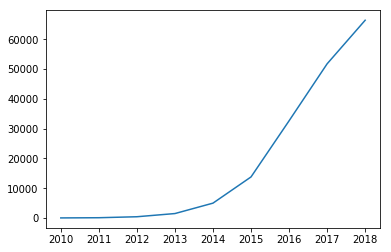

In [48]:
plt.plot(year_reviews)

**Summary** 
- Mean review per month per listing : 1.16
- Total reviews since 2010-10-18 : 171503
- Total reviews per year : 

|Year   |Count|
|---	|---	|
|2009|0|
|2010|4|
|2011|69|
|2012|397|
|2013|1470|
|2014|4968|
|2015|13775|
|2016|32628|
|2017|51774|
|2018|66418|

### Saving csv

In [49]:
lyon_listings_per_price.to_csv(r'data\France\Lyon\clean_lyon_listing.csv')
price_lyon.to_csv(r'data\France\Lyon\price_lyon.csv')
lyon_entire_house.to_csv(r'data\France\Lyon\lyon_entire_house.csv')
lyon_private_room.to_csv(r'data\France\Lyon\lyon_private_room.csv')

year_reviews.to_csv(r'data\France\Lyon\year_reviews.csv')